# 데이터 추출

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import FinanceDataReader as fdr

price_df = fdr.DataReader('SPY')

sns.set_style('whitegrid')

price_df = fdr.DataReader('SPY')
price_df.index.name = 'Date'
price_df.drop(['Adj Close'], axis=1, inplace=True)


display(price_df)

export_csv = price_df.to_csv('SPY.csv')

,Open,High,Low,Close,Volume
Date,,,,,
1993-01-29,43.968750,43.968750,43.750000,43.937500,1003200
1993-02-01,43.968750,44.250000,43.968750,44.250000,480500
1993-02-02,44.218750,44.375000,44.125000,44.343750,201300
1993-02-03,44.406250,44.843750,44.375000,44.812500,529400
1993-02-04,44.968750,45.093750,44.468750,45.000000,531500
...,...,...,...,...,...
2024-10-01,573.400024,574.059998,566.000000,568.619995,72668800
2024-10-02,567.710022,569.900024,565.270020,568.859985,38097800
2024-10-03,567.359985,569.799988,565.489990,567.820007,40846500


# Practice 1

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
data = pd.read_csv('gpascore.csv')
data = data.dropna() # NAN/빈칸있는 행을 제거

x = []
y = data['admit'].values

# 입력 데이터 준비
for i, rows in data.iterrows(): #iterrows = data라는 데이터프레임을 가로 한줄씩 출력, 반복문 변수를 최대 두 개까지
    x.append([rows['gre'], rows['gpa'], rows['rank']])

# 모델 정의
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation="sigmoid"),  # 입력층, 괄호 안 숫자는 노드 개수
    tf.keras.layers.Dense(128, activation="sigmoid"), # 은닉층, 괄호 안 숫자는 노드 개수
    tf.keras.layers.Dense(1, activation="sigmoid"),   # 출력층 (이진 분류), 괄호 안 숫자는 노드 개수 -> 0~1의 확률을 예측하기 때문에
])

# 모델 컴파일
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(np.array(x), np.array(y), epochs=10) # (x = 학습데이터(gre,gpa,rank), y=합격 결과, epochs=몇번 학습시킬지)

# x = [[학생1 데이터], [학생2 데이터],,,], 일반 리스트르 numpy array로 변환시켜서 입력해줘야함 -> 그래야 fit(model)에 집어넣기 가능
# y = [[0],[1],[0],,,,], 일반 리스트르 numpy array로 변환시켜서 입력해줘야함 -> 그래야 fit(model)에 집어넣기 가능

# 모델을 이용한 예측
prediction = model.predict(np.array([[950, 3.70, 1], [700, 3.50, 2]]))
print(prediction)


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.4859 - loss: 0.7616
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.5419 - loss: 0.6975
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - accuracy: 0.4597 - loss: 0.6975
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step - accuracy: 0.5353 - loss: 0.6927
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - accuracy: 0.4641 - loss: 0.7027
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 486us/step - accuracy: 0.5474 - loss: 0.6949
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.4463 - loss: 0.7009
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 419us/step - accuracy: 0.5365 - loss: 0.6920
Epoch 9/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 441us/step - accuracy: 0.5359 - loss: 0.6897
Epoch 10/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.5466 - loss: 0.6889
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
[[0.4905031 ]
 [0.48780152]]


# Project1 (주가 예측)

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_38 (LSTM)                  │ (None, 14, 64)         │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_39 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,369 (118.63 KB)

 Trainable params: 30,369 (118.63 KB)

 Non-trainable params: 0 (0.00 B)

No weights found, training model from scratch
Epoch 1/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0252 - val_loss: 0.0523
Epoch 2/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.6192e-04 - val_loss: 0.0431
Epoch 3/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.4195e-04 - val_loss: 0.0179
Epoch 4/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.5786e-04 - val_loss: 0.0190
Epoch 5/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.9255e-04 - val_loss: 0.0089
Epoch 6/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.1233e-04 - val_loss: 0.0140
Epoch 7/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0304e-04 - val_loss: 0.0293
Epoch 8/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.4874e-04 - val_loss: 0.0137
Epoch 9/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.3063e-04 - val_loss: 0.0062
Epoch 10/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.5109e-04 - val_loss: 0.0126
Epoch 11/30
202/202 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - lo

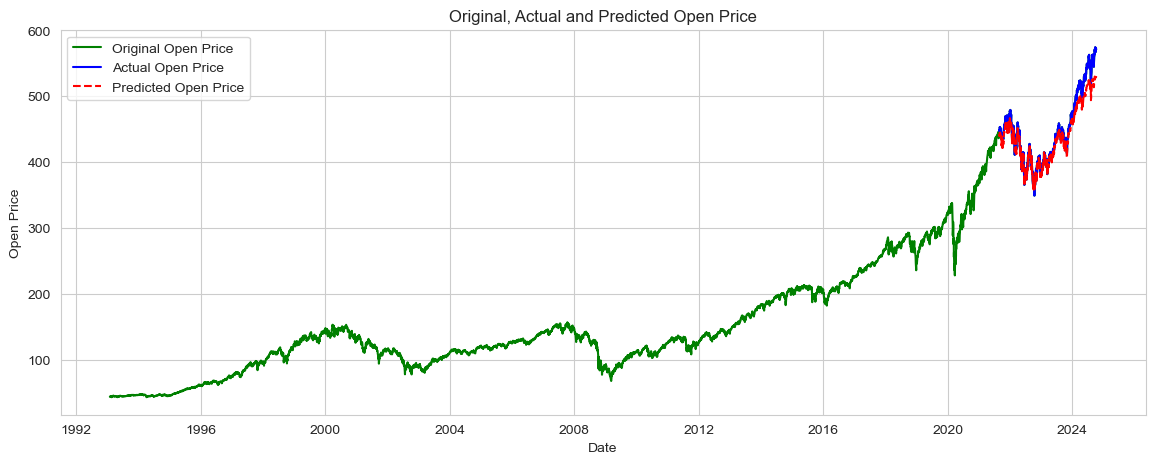

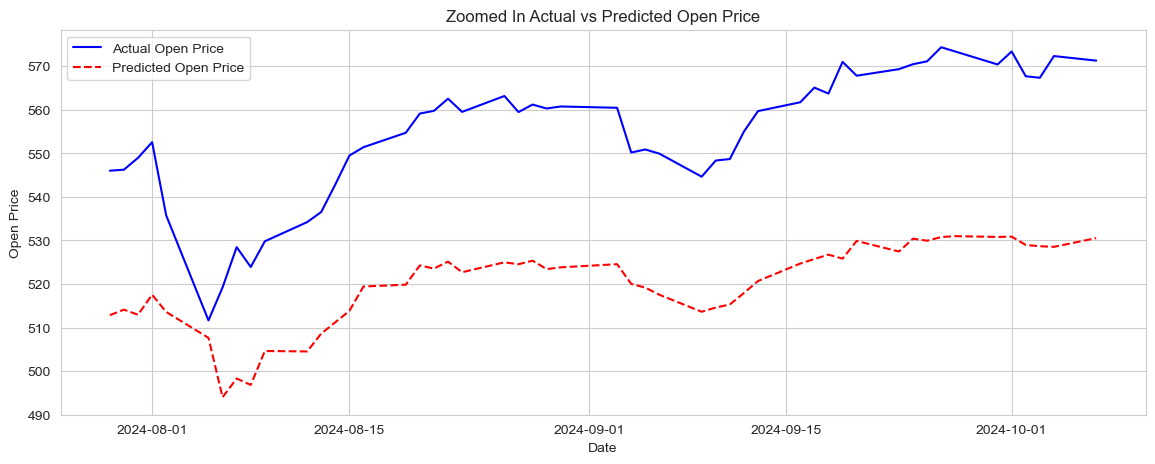

In [25]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import FinanceDataReader as fdr
import os

# Create the directory if it doesn't exist
save_dir = './save_weights/'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Fetch stock data using FinanceDataReader
stock_data = fdr.DataReader('SPY')

# Save original 'Open' prices for later
original_open = stock_data['Open'].values

# Separate dates for future plotting
dates = stock_data.index

# Variables for training
cols = list(stock_data)[0:5]  # 'Open', 'High', 'Low', 'Close', 'Volume'

# New dataframe with only training data - 5 columns
stock_data = stock_data[cols].astype(float)

# Normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(stock_data)
stock_data_scaled = scaler.transform(stock_data)

# Split to train data and test data
n_train = int(0.9 * stock_data_scaled.shape[0])
train_data_scaled = stock_data_scaled[0:n_train]
train_dates = dates[0:n_train]

test_data_scaled = stock_data_scaled[n_train:]
test_dates = dates[n_train:]

# Data reformatting for LSTM
pred_days = 1  # prediction period
seq_len = 14   # sequence length = past days for future prediction
input_dim = 5   # input dimension = ['Open', 'High', 'Low', 'Close', 'Volume']

trainX = []
trainY = []
testX = []
testY = []

for i in range(seq_len, n_train - pred_days + 1):
    trainX.append(train_data_scaled[i - seq_len:i, 0:train_data_scaled.shape[1]])
    trainY.append(train_data_scaled[i + pred_days - 1:i + pred_days, 0])

for i in range(seq_len, len(test_data_scaled) - pred_days + 1):
    testX.append(test_data_scaled[i - seq_len:i, 0:test_data_scaled.shape[1]])
    testY.append(test_data_scaled[i + pred_days - 1:i + pred_days, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

# LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(trainY.shape[1]))

model.summary()

# Specify your learning rate
learning_rate = 0.01
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='mse')

# Try to load weights
try:
    model.load_weights('./save_weights/lstm_weights.h5')
    print("Loaded model weights from disk")
except:
    print("No weights found, training model from scratch")
    # Fit the model
    history = model.fit(trainX, trainY, epochs=30, batch_size=32,
                        validation_split=0.1, verbose=1)
    # Save model weights after training
    model.save_weights(os.path.join(save_dir, 'lstm_weights.weights.h5'))


    #plt.plot(history.history['loss'], label='Training loss')
    #plt.plot(history.history['val_loss'], label='Validation loss')
    #plt.legend()
    #plt.show()

# Prediction
prediction = model.predict(testX)

# Generate array filled with means for prediction
mean_values_pred = np.repeat(scaler.mean_[np.newaxis, :], prediction.shape[0], axis=0)

# Substitute predictions into the first column
mean_values_pred[:, 0] = np.squeeze(prediction)

# Inverse transform
y_pred = scaler.inverse_transform(mean_values_pred)[:, 0]

# Generate array filled with means for testY
mean_values_testY = np.repeat(scaler.mean_[np.newaxis, :], testY.shape[0], axis=0)

# Substitute testY into the first column
mean_values_testY[:, 0] = np.squeeze(testY)

# Inverse transform
testY_original = scaler.inverse_transform(mean_values_testY)[:, 0]

# Plotting
plt.figure(figsize=(14, 5))
plt.plot(dates, original_open, color='green', label='Original Open Price')
plt.plot(test_dates[seq_len:], testY_original, color='blue', label='Actual Open Price')
plt.plot(test_dates[seq_len:], y_pred, color='red', linestyle='--', label='Predicted Open Price')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Original, Actual and Predicted Open Price')
plt.legend()
plt.show()

# Calculate the start and end indices for the zoomed plot
zoom_start = len(test_dates) - 50
zoom_end = len(test_dates)

# Create the zoomed plot
plt.figure(figsize=(14, 5))

# Adjust the start index for the testY_original and y_pred arrays
adjusted_start = zoom_start - seq_len

plt.plot(test_dates[zoom_start:zoom_end],
         testY_original[adjusted_start:zoom_end - zoom_start + adjusted_start],
         color='blue',
         label='Actual Open Price')

plt.plot(test_dates[zoom_start:zoom_end],
         y_pred[adjusted_start:zoom_end - zoom_start + adjusted_start],
         color='red',
         linestyle='--',
         label='Predicted Open Price')

plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Zoomed In Actual vs Predicted Open Price')
plt.legend()
plt.show()
